<a href="https://colab.research.google.com/github/petervinhchau/public/blob/main/Notebook_Module1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Mount Google Drive and extract project files
from google.colab import drive
drive.mount('/content/drive')

!rm -rf /content/ProjectModule1/ /content/codes /content/data /content/plots /content/utils /content/__MACOSX/

!unzip -oq '/content/drive/My Drive/colab/ece246/tmp2/ProjectModule1.zip' -d /content/

!rsync -a --ignore-existing /content/ProjectModule1/ /content/

!echo done

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
done


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from utils import mnist_reader
from utils.data_load import load
import codes
# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Section #1.1: Linear Regression
Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [3]:
def get_data():
    """
    Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.
    """
    X_train, y_train = load('./data/regression/regression_train.csv')
    X_test, y_test = load('./data/regression/regression_test.csv')
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test= get_data()


print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (30, 1)
Train target shape:  (30,)
Test data shape:  (30, 1)
Test target shape:  (30,)


<ipython-input-4-ab36d7fc405c>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


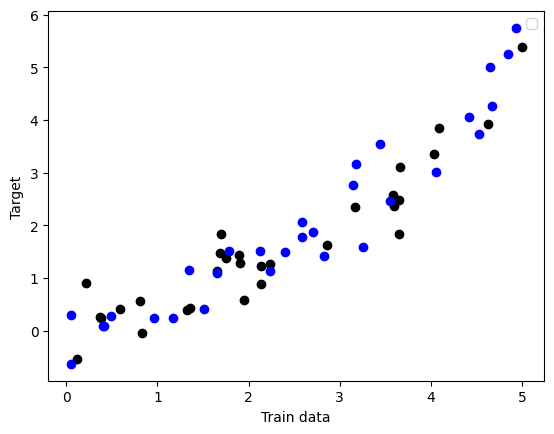

In [4]:
## PART (a):
## Plot the training and test data ##

plt.plot(X_train, y_train,'o', color='black')
plt.plot(X_test, y_test,'o', color='blue')
plt.xlabel('Train data')
plt.ylabel('Target')
plt.legend()
plt.show()

## Training Linear Regression
In the following cells, you will build a linear regression. You will implement its loss function, then subsequently train it with gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the opimal solution using closed form expression.

In [5]:
from codes.Regression import Regression

In [6]:
## PART (d):
## Complete loss_and_grad function in Regression.py file and test your results.
regression = Regression(m=1, reg_param=0)
loss, grad = regression.loss_and_grad(X_train,y_train)
print('Loss value',loss)
print('Gradient value',grad)
##

Loss value 4.28238063301286
Gradient value [[ -3.19217252]
 [-10.44504584]]


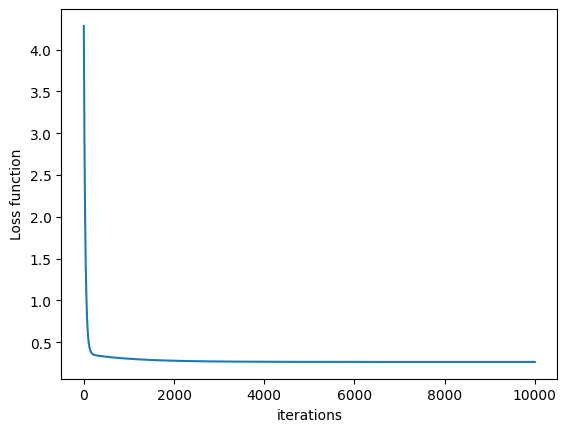

[[-0.37469204]
 [ 0.88377017]]
Final loss: 0.2641846537670642


In [7]:
## PART (e):
## Complete train_LR function in Regression.py file
loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=30, num_iters=10000)
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(w)
print('Final loss:',loss_history[-1])

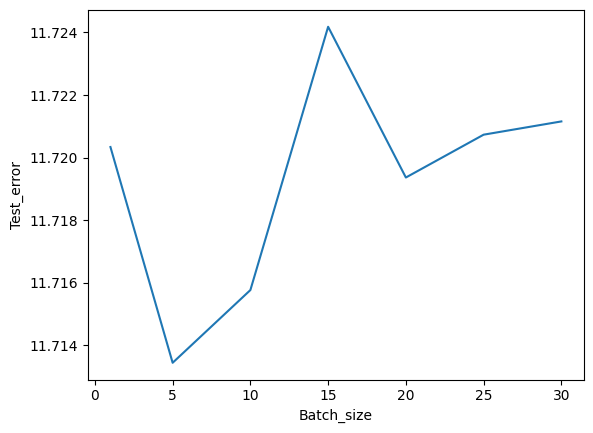

In [8]:
## PART (e) (Different Batch Sizes):
from numpy.linalg import norm
Batch = [1, 5, 10, 15, 20, 25, 30]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the linear regression for different batch size Avergae the test error over 10 times
# ================================================================ #
N = len(y_test)
for i,batch_size in enumerate(Batch):
    batch_test_err = []
    for _ in range(10):
        loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=batch_size, num_iters=10000)
        batch_test_err.append(norm(y_test - regression.predict(X_test))/np.sqrt(N)) # RMSE sqrt(sum_n{|y_n-w*x_n|^2}/N) = ||y - X*w||/sqrt(N)
    test_err[i] = np.mean(batch_test_err)
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(Batch,test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

In [9]:
## PART (f):
## Complete closed_form function in Regression.py file
loss_2, w_2 = regression.closed_form(X_train, y_train)
print('Optimal solution loss',loss_2)
print('Optimal solution gradient',w_2)

Optimal solution loss 0.26417938203964436
Optimal solution gradient [[-0.37906992]
 [ 0.8852483 ]]


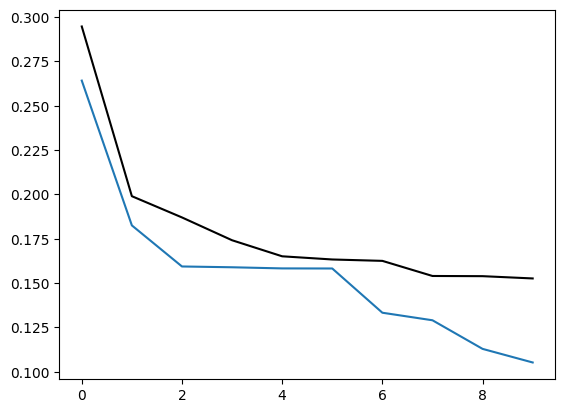

In [10]:
## PART (h):
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
for m in range(1,11):
    regression = Regression(m=m)
    train_loss[m-1,:],_ = regression.closed_form(X_train,y_train)
    test_loss[m-1:],_ = regression.closed_form(X_test,y_test)

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
plt.plot(train_loss)
plt.plot(test_loss, color='black')
plt.show()

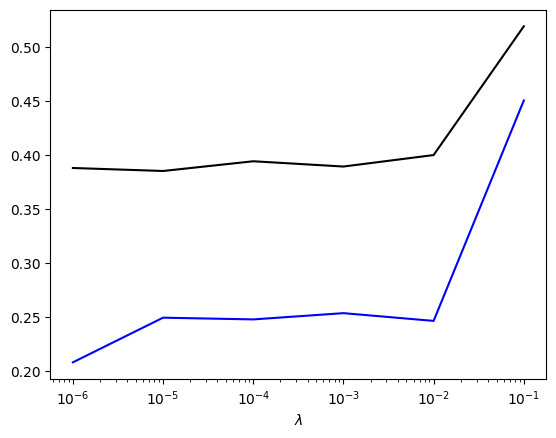

In [11]:
#PART (j):
lam= [10.0**-1,10.0**-2,10.0**-3,10.0**-4,10.0**-5,10.0**-6]
train_loss=np.zeros((len(lam),1))
test_loss=np.zeros((len(lam),1))
batch_size =10
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# by taking average on 10 runs per lambda value
# ================================================================ #
for i,reg in enumerate(lam):
    for n in range(10):
        regression = Regression(m=1,reg_param=reg) # re-initialize to zero out the weights each run

        loss_history, w = regression.train_LR(X_train,y_train,eta=1e-3,batch_size=batch_size,num_iters=10000)
        train_loss[i,0] += loss_history[-1]/10
        test_loss[i,0]  += regression.loss_and_grad(X_test,y_test)[0] / 10
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
plt.figure()
plt.semilogx(lam,train_loss, color='blue',label='train loss')
plt.semilogx(lam,test_loss, color='black',label='test loss')
plt.xlabel(r'$\lambda$')
# plt.show()

# plt.figure()
plt.show()

# Section #1.2: Binary Classification

Please follow our instructions in the same order to solve the binary classification problem.
Please print out the entire results and codes when completed.

In [12]:
#X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
#X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')

print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (5000, 784)
Train target shape:  (5000, 1)
Test data shape:  (500, 784)
Test target shape:  (500, 1)


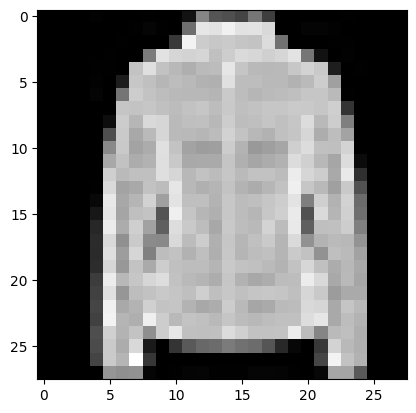

label is Shirt


In [13]:
# PART (a):
# To Visualize a point in the dataset
index = 11
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
if y_train[index] == 1:
    label = 'Dress'
else:
    label = 'Shirt'
print('label is', label)

## Train Perceptron
In the following cells, you will build Perceptron Algorithm.

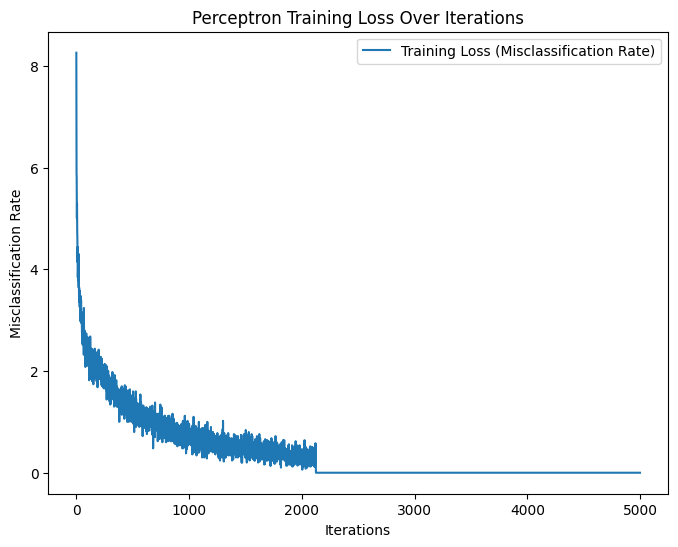

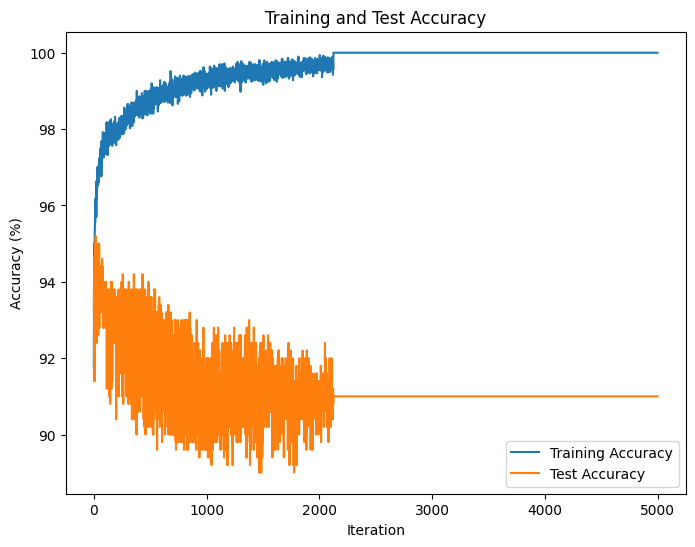

Final value of the loss function: 0.0%
Squared L2 norm of the weight vector: 659979038983.0
The Perceptron algorithm has converged.


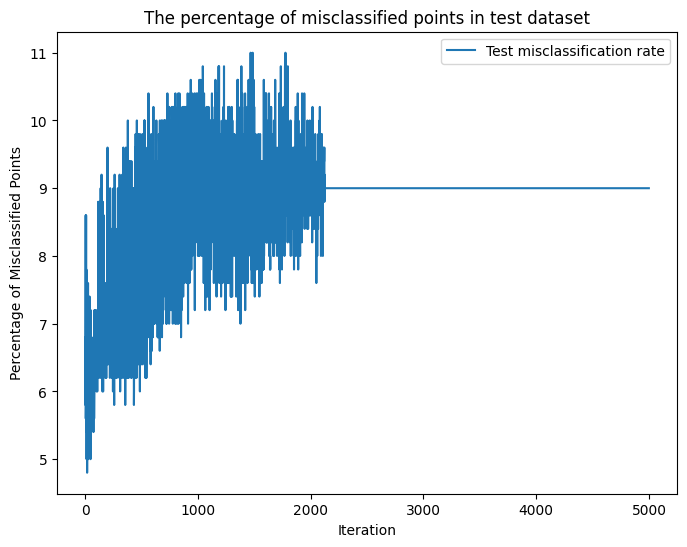

Final test accuracy: 91.0%
Final percentage of misclassified points in test dataset: 9.0%


In [14]:
# PART (b),(c):
# Implement the perceptron Algorithm and compute the number of mis-classified points
N = X_train.shape[0] # Number of data point train
N_test = X_test.shape[0] # Number of data point test
d = X_train.shape[1] # Number of features
loss_hist = []
W = np.zeros((d+1,1))
X_train_h = np.hstack((np.ones((N,1)), X_train))
X_test_h = np.hstack((np.ones((N_test,1)), X_test))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test accuracy in the same plot
# ================================================================ #
num_iter = N
train_accuracy_hist = []
test_accuracy_hist = []
misclassified_percentage_test_hist = []

for iteration in range(num_iter):
    misclassified_train = 0
    for i in range(N):
        xi = X_train_h[i].reshape(-1, 1)
        yi = y_train[i]
        prediction = np.sign(np.dot(W.T, xi))
        if prediction != yi:
            misclassified_train += 1
            W += yi * xi

    # Calculate the percentage of misclassified points in training set
    misclassified_percentage_train = (misclassified_train / N) * 100
    loss_hist.append(misclassified_percentage_train)

    # Calculate training accuracy
    train_accuracy = 100 - misclassified_percentage_train
    train_accuracy_hist.append(train_accuracy)

    # Calculate test accuracy
    misclassified_test = 0
    for i in range(N_test):
        xi_test = X_test_h[i].reshape(-1, 1)
        yi_test = y_test[i]
        prediction_test = np.sign(np.dot(W.T, xi_test))
        if prediction_test != yi_test:
            misclassified_test += 1

    misclassified_percentage_test = (misclassified_test / N_test) * 100
    misclassified_percentage_test_hist.append(misclassified_percentage_test)

    test_accuracy = 100 - misclassified_percentage_test
    test_accuracy_hist.append(test_accuracy)

# Plot the loss function history
plt.figure(figsize=(8, 6))
plt.plot(range(num_iter), loss_hist, label="Training Loss (Misclassification Rate)")
plt.xlabel("Iterations")
plt.ylabel("Misclassification Rate")
plt.title("Perceptron Training Loss Over Iterations")
plt.legend()
plt.show()

# Plot training and test accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy_hist, label='Training Accuracy')
plt.plot(test_accuracy_hist, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()


# Final value of the loss function
final_loss = loss_hist[-1]
print(f"Final value of the loss function: {final_loss}%")

# Squared L2 norm of the weight vector
l2_norm_squared = np.linalg.norm(W)**2
print(f"Squared L2 norm of the weight vector: {l2_norm_squared}")

# Comment on convergence
if final_loss == 0:
    print("The Perceptron algorithm has converged.")
else:
    print("The Perceptron algorithm did not converge within the given number of iterations.")

# Plot the Test misclassification rate
plt.figure(figsize=(8, 6))
plt.plot(misclassified_percentage_test_hist, label='Test misclassification rate')
plt.xlabel('Iteration')
plt.ylabel('Percentage of Misclassified Points')
plt.title('The percentage of misclassified points in test dataset')
plt.legend()
plt.show()

final_test_accuracy = test_accuracy_hist[-1]
print(f"Final test accuracy: {final_test_accuracy}%")

final_misclassified_percentage_test = misclassified_percentage_test_hist[-1]
print(f"Final percentage of misclassified points in test dataset: {final_misclassified_percentage_test}%")

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

## Train Logistic Regression
In the following cells, you will build a logistic regression. You will implement its loss function, then subsequently train it with gradient descent.

In [15]:
from codes.Logistic import Logistic

In [16]:
## PART (f):
X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')
## Complete loss_and_grad function in Logistic.py file and test your results.
N,d = X_train.shape
logistic = Logistic(d=d, reg_param=0)
loss, grad = logistic.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= 0.6931471805579453
4123929.351164951


/content/codes/Logistic.py:59: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-scores))


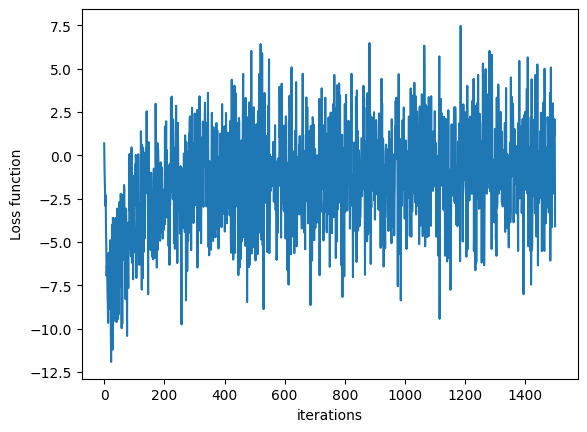

Weight squared norm 1.6847312085231203
Final loss -4.096818795619706


In [17]:
## PART (g):
## Complete train_LR function in Logisitc.py file
loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-6,batch_size=100, num_iters=1500)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('./plots/LR_loss_hist.pdf')
print('Weight squared norm',np.linalg.norm(w,ord=2)**2)
print('Final loss',loss_history[-1])

In [18]:
# PART (h)
# Complete predict function in Logisitc.py file and compute the percentage of mis-classified points
y_pred = logistic.predict(X_test)
test_err = np.sum((y_test!=y_pred))*100/X_test.shape[0]
print(test_err,'%')

97.4 %


/content/codes/Logistic.py:59: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-scores))


Best batch size: 1, with test error: 0.97%


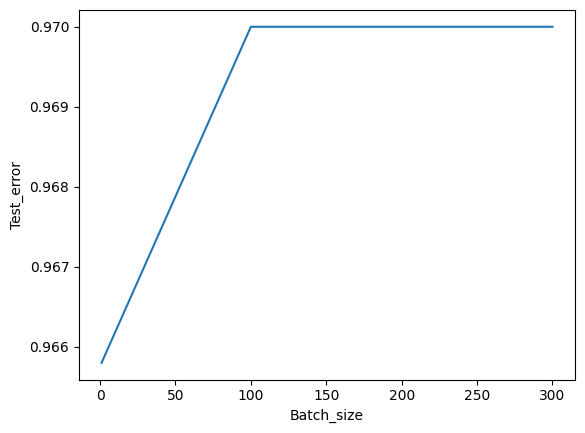

In [19]:
## PART (i):
Batch = [1, 100, 200, 300]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different batch size. Avergae the test error over 10 times
# ================================================================ #
for i in range(len(Batch)):
    batch_size = Batch[i]
    test_error = 0
    num_iters = int(6000 / batch_size)
    for j in range(10):
        loss_history, w = logistic.train_LR(X_train,y_train,eta=1e-5,batch_size=batch_size, num_iters=num_iters)
        y_test_pred = logistic.predict(X_test)
        test_error += np.sum((y_test!=y_test_pred))/X_test.shape[0]
    test_error/=10
    test_err[i] = test_error

min_idx = np.argmin(test_err)
best_batch_size = Batch[min_idx]
best_test_err = min(test_err)

print(f"Best batch size: {best_batch_size}, with test error: {best_test_err[0]:.2f}%")
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(Batch,test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

## Train SVM
In the following cells, you will build SVM. You will implement its loss function, then subsequently train it with mini-batch gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the best regularization parameter.

In [20]:
from codes.SVM import SVM

In [21]:
## PART (l):
## Complete loss_and_grad function in Logistic.py file and test your results.
N,d = X_train.shape
svm = SVM(d=d, reg_param=0)
loss, grad = svm.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= 1.0
753771.6344130799


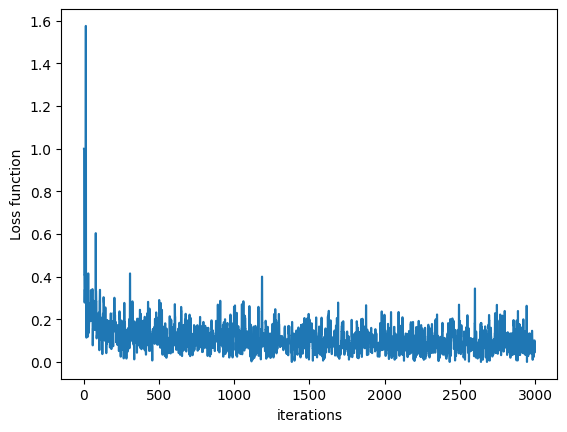

9.590982699719999e-05
0.04602940559999984


In [22]:
## PART (m):
## Complete train_svm function in SVM.py file
loss_history, w = svm.train_svm(X_train,y_train, eta=1e-6,batch_size=50, num_iters=1500)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('./plots/svm_loss_hist.pdf')
print(np.linalg.norm(w,ord=2)**2)
print(loss_history[-1])

In [23]:
print(f"The final loss is {loss_history[-1]:.3f}%.")
print(f"The square Frobenius norm of the weight matrix is {np.linalg.norm(w,ord=2)**2}.")

The final loss is 0.046%.
The square Frobenius norm of the weight matrix is 9.590982699719999e-05.


In [24]:
# PART (n):
# Complete predict function in SVM.py file and compute the percentage of mis-classified points
y_pred = svm.predict(X_test)
test_err_prec = np.sum((y_test!=y_pred))*100/X_test.shape[0]
print(test_err_prec)

5.4


In [25]:
print(f"The percentage of the missclassified points in the test data is {test_err_prec:.2f}%.")

The percentage of the missclassified points in the test data is 5.40%.


Best batch size: 1, with test error: 7.00%


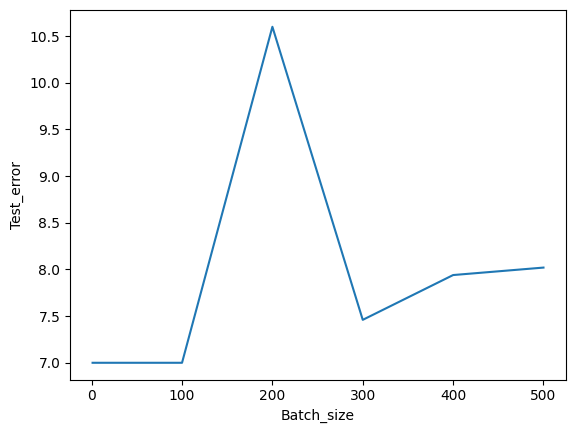

In [26]:
# PART (o)
Batch = [1, 100, 200, 300, 400, 500]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the SVM for different batch size Avergae the test error over 10 times
# ================================================================ #
num_trials = 10
eta = 1e-5

for i, b in enumerate(Batch):
    num_iter = 6000 // b
    avg_test_err = 0

    for trial in range(num_trials):
        svm = SVM(d=X_train.shape[1])

        svm.train_svm(X_train, y_train, eta=eta, batch_size=b, num_iters=num_iter)

        y_pred = svm.predict(X_test)
        test_error = np.mean(y_pred != y_test) * 100
        avg_test_err += test_error

    test_err[i] = avg_test_err / num_trials

best_index = np.argmin(test_err)
best_batch_size = Batch[best_index]
best_test_error = test_err[best_index]

print(f"Best batch size: {best_batch_size}, with test error: {best_test_error[0]:.2f}%")

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(Batch,test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/svm_Batch_test.pdf')

## Train Kernelized SVM
In the following cells, you will build a RBF-SVM. You will use sklearn.svm.SVC package and its functions to train a RBF SVM. You will try to select a regularization parameter C and compare your results with non-kernelized SVM.

In [27]:
# PART (p)
from sklearn.svm import SVC

Best C: 0.75, with test error: 4.20%


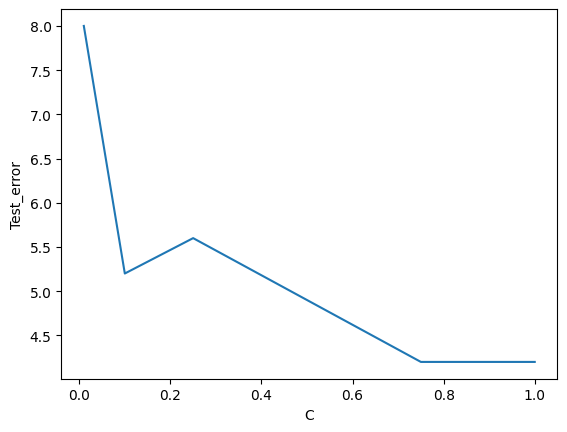

In [28]:
C_range = [0.01,0.1, 0.25, 0.75, 1] # inverse regularization parameter
test_err = np.zeros((len(C_range),1))
# Notes about sklearn.SVM
# example definition of SVM classifier: clf = SVC (kernel='rbf', C = C)
# Use clf.fit (X_train, y_train.ravel()) to train the model
# Use 2*(clf.decision_function(X_test)>0)-1 to get the classification decisions (y_pred)
# ================================================================ #
# YOUR CODE HERE:
# Train the kernelized SVM for different C
# ================================================================ #
# from sklearn.metrics import accuracy_score

for i, C in enumerate(C_range):
    clf = SVC(kernel='rbf', C=C)
    clf.fit(X_train, y_train.ravel())

    y_pred = 2 * (clf.decision_function(X_test) > 0) - 1

    #test_err[i] = 1 - accuracy_score(y_test, y_pred)
    test_err[i] = np.mean(y_pred != y_test.ravel())*100

best_index = np.argmin(test_err)
best_C = C_range[best_index]
best_test_error = test_err[best_index]

print(f"Best C: {best_C}, with test error: {best_test_error[0]:.2f}%")

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(C_range,test_err)
plt.xlabel('C')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/svm_C_test.pdf')

# Section #1.3: Multi-Class Logistic Regression and Adaboost

Please follow our instructions in the same order to solve the linear regresssion problem.
Please print out the entire results and codes when completed.

In [29]:
X_train, y_train = mnist_reader.load_mnist('./data/fashion-mnist', kind='train')
X_test, y_test = mnist_reader.load_mnist('./data/fashion-mnist', kind='t10k')
print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)
label = {0:'T-shirt/Top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

Train data shape:  (60000, 784)
Train target shape:  (60000,)
Test data shape:  (10000, 784)
Test target shape:  (10000,)


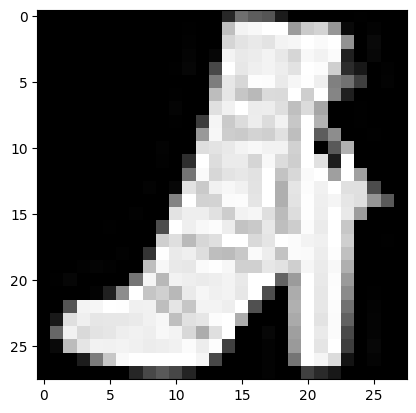

label is Ankle boot


In [30]:
# PART (a)
# To Visualize a point in the dataset
index = 11
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
fig.savefig('./plots/Sample.pdf')
print('label is', label[y_train[index]])

## Train Multi-Class Logistic Regression

In the following cells, you will build a Multi-Class logistic regression. You will implement its loss function, then subsequently train it with gradient descent. You will implement L1 norm regularization, and choose the best regularization parameter.

In [31]:
from codes.MLogistic import MLogistic

In [32]:
## PART (d)
## Complete loss_and_grad function in Logistic.py file and test your results.
num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]

logistic = MLogistic(dim=[num_classes,num_features], reg_param=0)
loss, grad = logistic.loss_and_grad(X_train[:5000],y_train[:5000])
print('Loss function=',loss)
print('Frobenius norm of grad=',np.linalg.norm(grad))
##

Loss function= 2.3025850929940455
Frobenius norm of grad= 424.07889418407046


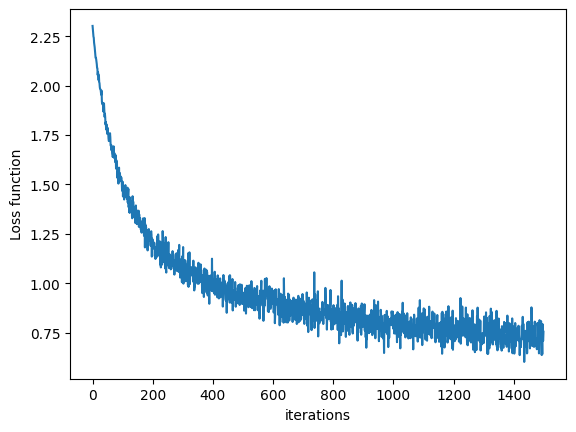

0.011220383095917583
0.7543105240611019


In [33]:
## PART (e):
## Complete train_LR function in Logistic.py file
loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-7,batch_size=200, num_iters=1500)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('./plots/loss_hist.pdf')
print(np.linalg.norm(w))
print(loss_history[-1])

In [34]:
## PART (f):
## Complete predict function in Logistic.py file and compute the trainin error and the test error

y_train_pred = logistic.predict(X_train)
print('training error:', 1-np.mean(np.equal(y_train,y_train_pred)))
y_test_pred = logistic.predict(X_test)
print('test error:',1-np.mean(np.equal(y_test, y_test_pred)))

training error: 0.23306666666666664
test error: 0.24580000000000002


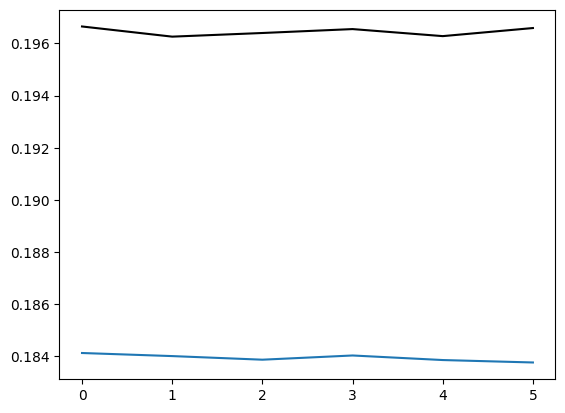

In [35]:
## PART (h):
reg = [0,1e-6,1e-3,1e-2,1e-1,1]
train_err =np.zeros((len(reg),1))
test_err =np.zeros((len(reg),1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
for i, lambda_val in enumerate(reg):
    logistic = MLogistic(dim=[num_classes, num_features], reg_param=lambda_val)
    avg_train_err = 0
    avg_test_err = 0
    for _ in range(10):
        loss_history, w = logistic.train_LR(X_train, y_train, eta=1e-7, batch_size=200, num_iters=1500)
        y_train_pred = logistic.predict(X_train)
        train_error = 1 - np.mean(np.equal(y_train, y_train_pred))
        avg_train_err += train_error
        y_test_pred = logistic.predict(X_test)
        test_error = 1 - np.mean(np.equal(y_test, y_test_pred))
        avg_test_err += test_error
    train_err[i] = avg_train_err / 10
    test_err[i] = avg_test_err / 10
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(train_err)
plt.plot(test_err, color='black')
plt.show()
fig.savefig('./plots/Regularization.pdf')

In [36]:
from sklearn.tree import DecisionTreeClassifier

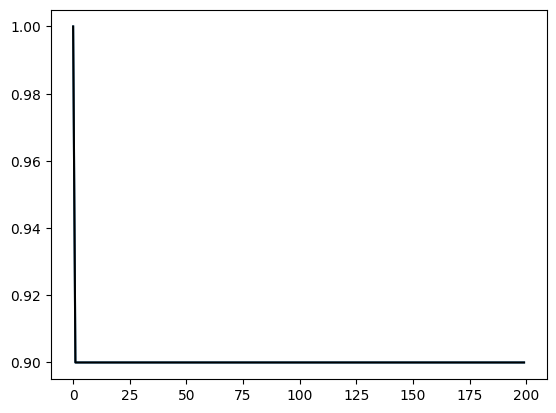

In [37]:
## PART (i):
T = 200
N = X_train.shape[0]
num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]
train_err = np.zeros((T,1))
test_err = np.zeros((T,1))

# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# as a function of number of classifiers T for Adaboost Algorithm.
# ================================================================ #
weights = np.ones(N) / N
classifiers = []
alphas = []

for t in range(T):
    clf = DecisionTreeClassifier(max_depth=1)
    clf.fit(X_train, y_train, sample_weight=weights)
    predictions = clf.predict(X_train)
    err = np.sum(weights * (predictions != y_train)) / np.sum(weights)
    alpha = 0.5 * np.log((1 - err) / max(err, 1e-10))
    weights *= np.exp(-alpha * y_train * predictions)
    weights /= np.sum(weights)

    classifiers.append(clf)
    alphas.append(alpha)

    train_predictions = np.zeros(N)
    for clf, alpha in zip(classifiers[:t+1], alphas[:t+1]):
        train_predictions += alpha * clf.predict(X_train)
    train_err[t] = np.mean(np.sign(train_predictions) != y_train)

    N_test = X_test.shape[0]
    test_predictions = np.zeros(N_test)
    for clf, alpha in zip(classifiers[:t+1], alphas[:t+1]):
        test_predictions += alpha * clf.predict(X_test)
    test_err[t] = np.mean(np.sign(test_predictions) != y_test)

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(train_err)
plt.plot(test_err, color='black')
plt.show()
fig.savefig('./plots/Adaboost.pdf')